## Этап 1: Исследовательский анализ данных

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
age_data = pd.read_csv('/datasets/faces/labels.csv')
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


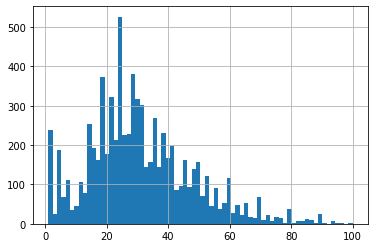

In [3]:
age_data['real_age'].unique()
age_data['real_age'].hist(bins = 70)

In [4]:
age_data['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

Found 7591 images belonging to 1 classes.


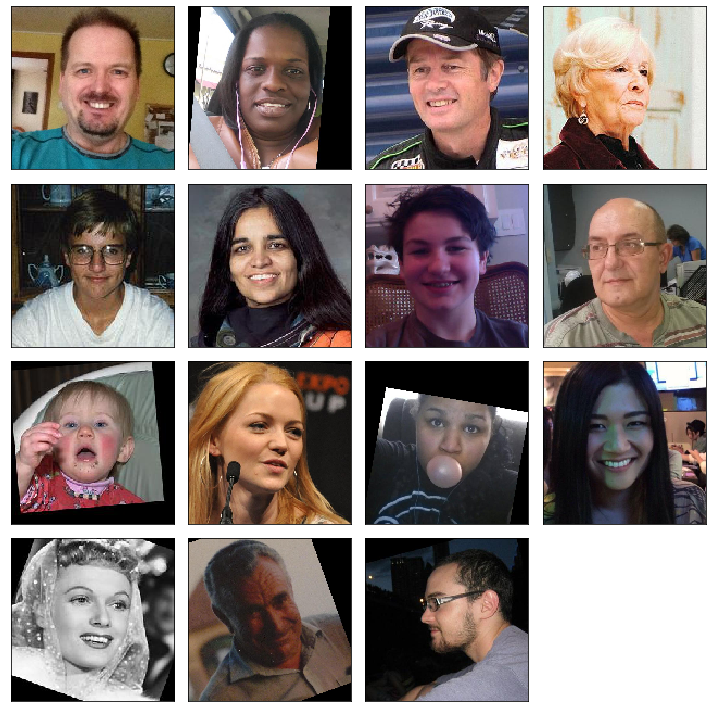

In [5]:
datagen = ImageDataGenerator(rescale=1./255)

datagen_flow = datagen.flow_from_directory(
    '/datasets/faces',
    target_size=(150, 150),
    batch_size=16,
    class_mode='sparse',
    seed=12345)

features, target = next(datagen_flow)
fig = plt.figure(figsize=(10,10))

for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

## Этап 2: Обучение модели

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, horizontal_flip=True, rescale=1./255)
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_gen_flow
 
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_gen_flow
 
 
def create_model(input_shape):
 
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])
 
 
    return model
 
 
def train_model(model, train_data, test_data, batch_size=None, epochs=15,
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

356/356 - 115s - loss: 199.1253 - mae: 10.2819 - val_loss: 558.6340 - val_mae: 18.5723  
Epoch 2/15  
356/356 - 42s - loss: 83.6119 - mae: 6.9035 - val_loss: 210.5661 - val_mae: 10.9000  
Epoch 3/15  
356/356 - 42s - loss: 57.5204 - mae: 5.8373 - val_loss: 79.1856 - val_mae: 6.7354  
Epoch 4/15  
356/356 - 43s - loss: 44.2609 - mae: 5.0992 - val_loss: 78.8926 - val_mae: 6.5679  
Epoch 5/15  
356/356 - 42s - loss: 35.4768 - mae: 4.5514 - val_loss: 73.5968 - val_mae: 6.3115  
Epoch 6/15  
356/356 - 42s - loss: 24.7354 - mae: 3.8532 - val_loss: 85.0457 - val_mae: 6.8249  
Epoch 7/15  
356/356 - 42s - loss: 18.1839 - mae: 3.2787 - val_loss: 69.1901 - val_mae: 6.1614  
Epoch 8/15  
356/356 - 42s - loss: 17.5792 - mae: 3.2195 - val_loss: 86.0132 - val_mae: 6.9537  
Epoch 9/15  
356/356 - 42s - loss: 14.8317 - mae: 2.9353 - val_loss: 67.2410 - val_mae: 6.2026  
Epoch 10/15  
356/356 - 43s - loss: 14.0250 - mae: 2.8615 - val_loss: 79.9498 - val_mae: 6.4450  
Epoch 11/15  
356/356 - 42s - loss: 13.1545 - mae: 2.7542 - val_loss: 61.3961 - val_mae: 5.8942  
Epoch 12/15  
356/356 - 42s - loss: 12.4574 - mae: 2.6467 - val_loss: 64.5648 - val_mae: 5.9588  
Epoch 13/15  
356/356 - 42s - loss: 11.3222 - mae: 2.5577 - val_loss: 88.0261 - val_mae: 7.2852  
Epoch 14/15  
356/356 - 43s - loss: 10.4825 - mae: 2.4795 - val_loss: 63.6498 - val_mae: 6.0675  
Epoch 15/15  
356/356 - 42s - loss: 10.2078 - mae: 2.4415 - val_loss: 60.5935 - val_mae: 5.7482  
  
119/119 - 10s - loss: 60.5935 - mae: 5.7482  
Test MAE: 5.7482  